# 测试相位响应曲线

`\snnpy\models\utils\PRC.py`

In [ ]:
import os
import sys
sys.path.append(r"../")
from utils.PRC import *
from nodes.HH import HH
import numpy as np
import matplotlib.pyplot as plt

## 测试 "相位漂移" 和 "相位响应曲线" 所使用的输入脉冲

In [ ]:
dt = 0.01
syn_test = syn_chem(2, dt=dt)
# print(syn.tau_d_q)
s_list = []
s1_list = []

n = 700
t_list = np.arange(0, n*dt, 0.01)
for i in range(n):
    t = i * dt
    syn_test(t, ts=[0.5, 1.])
    s_list.append(syn_test.s[0])
    s1_list.append(syn_test.s[1])

fig, axs = plt.subplots(2, sharex="all", layout='constrained')
axs[0].plot(t_list, s_list)
axs[1].plot(t_list, s1_list)
plt.show()

## 测试 "相位漂移"

In [ ]:
node = HH()
# phi_shift = phase_shift(node, phase=[0.1, 0.2, 0.3, 0.4, 0.6])
phi_shift = phase_shift(node, phase=[0.4, 0.6])
phi_shift.g_syn = 0.2

In [ ]:
# phi_shift.nodes.mem
# phi_shift.nodes.num
# phi_shift.num
# phi_shift.nodes.retuen_vars()
# phi_shift.nodes.t
print(phi_shift.T_spike_list)
# phi_shift.ts_list
# plt.plot(phi_shift.mem_no_in)

In [ ]:
phi_shift()

In [ ]:
print(phi_shift.T_spike_act_list)

In [ ]:
plt.plot(phi_shift.mem_in[:, :])
# plt.plot(phi_shift.mem_in[:, 1])
plt.plot(phi_shift.mem_no_in, color="r")
plt.xlim(5000, 9000)
# phi_shift.mem_in

In [ ]:
plt.plot(phi_shift.I_in)
plt.xlim(5000, 9000)

In [ ]:
phi_shift.plot_phase_shift()

In [ ]:
from nodes.RTM_HH import RTM_HH
node = RTM_HH()
node.Iex = 0.3
# phi_shift = phase_shift(node, phase=[0.1, 0.2, 0.3, 0.4, 0.6])
phi_shift = phase_shift(node, phase=[0.1, 0.6])
phi_shift.g_syn = 0.1
phi_shift()
phi_shift.plot_phase_shift()

In [6]:
import os
import sys
sys.path.append(r"../")
from utils.PRC import *
from nodes.HH import HH
import numpy as np
import matplotlib.pyplot as plt

In [2]:
node = HH()
# phi_shift = phase_shift(node, phase=[0.1, 0.2, 0.3, 0.4, 0.6])
PRCer = Phase_Response_Curves(node)
PRCer.g_syn = 0.2
PRCer()

In [3]:
# PRCer.T_spike_list
# PRCer.ts_list
# PRCer.in_phase
# PRCer.T_spike_act_list

In [4]:
prc = PRCer.return_PRC()

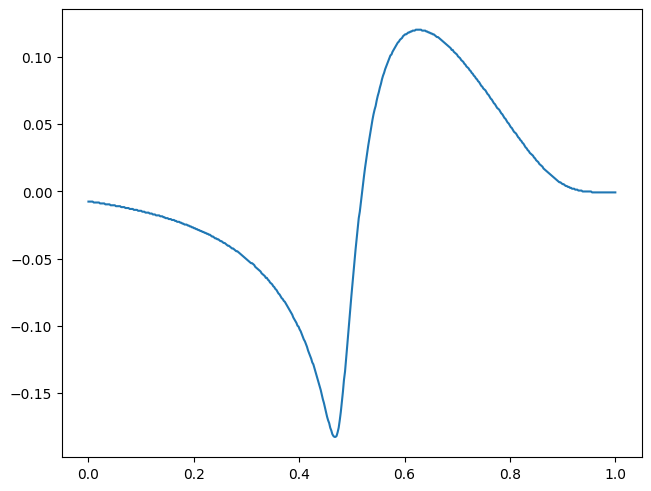

In [5]:
# plt.plot(prc)
PRCer.plot_PRC()

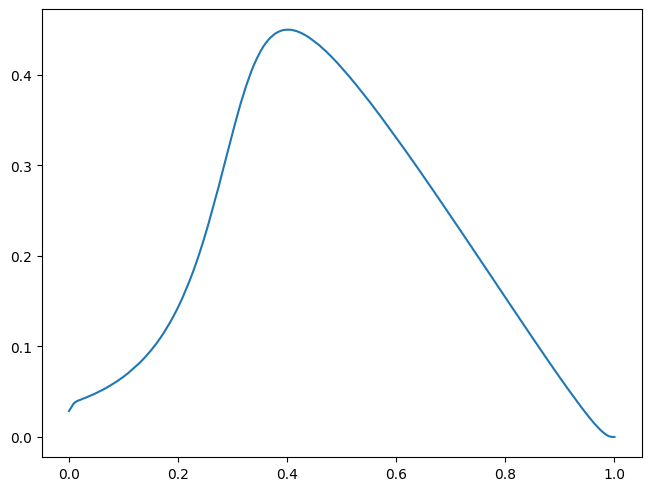

In [7]:
from nodes.RTM_HH import RTM_HH
node = RTM_HH()
node.Iex = 0.3
PRCer = Phase_Response_Curves(node)
PRCer.g_syn = 0.1
PRCer()
prc = PRCer.return_PRC()
PRCer.plot_PRC()